In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [28]:
img_file = "./assets/mobile_aloha/assets/small_meta_table_diffuse.png"

In [29]:
cv2.imread(img_file).shape

(1024, 1024, 3)

In [94]:
img_file = "./assets/mobile_aloha/assets/cardboard_raw.jpeg"
# img_file = "./assets/mobile_aloha/assets/tabletop_raw.jpeg"


In [95]:
img = cv2.imread(img_file)
img.shape

(4032, 3024, 3)

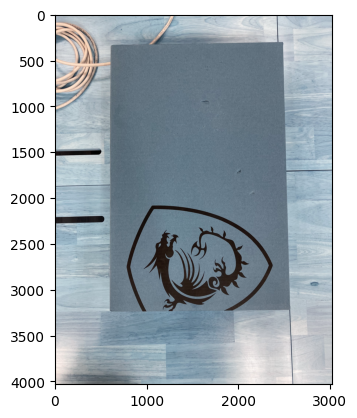

In [96]:
plt.imshow(img)

In [97]:
# card board
pts1 = np.array([(2555, 3221), (597, 3238), (607, 341), (2479, 307)], dtype=np.float32)
pts2 = np.array([(0, 0), (0, 357), (544, 357), (544, 0)], dtype=np.float32)

# tabletop
# pts1 = np.array([(50, 653), (3943, 598), (3970, 2497), (84, 2564)], dtype=np.float32)
# pts2 = np.array([(0, 600), (1218, 600), (1218, 0), (0, 0)], dtype=np.float32)

[2555. 3221.]
[ 597. 3238.]
[607. 341.]
[2479.  307.]


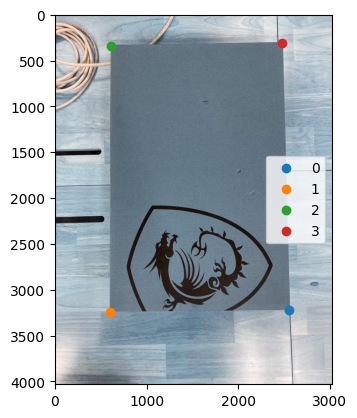

In [98]:
plt.imshow(img)

for i, pt in enumerate(pts1):
    print (pt)    
    plt.scatter([pt[0]], [pt[1]], label=i)
plt.legend()

In [99]:
# 射影行列の取得
M = cv2.getPerspectiveTransform(pts1, pts2) 
np.set_printoptions(precision=5, suppress=True)
print (M)

[[ -0.00164  -0.18921 613.65268]
 [ -0.19206   0.00501 474.58712]
 [  0.        0.00002   1.     ]]


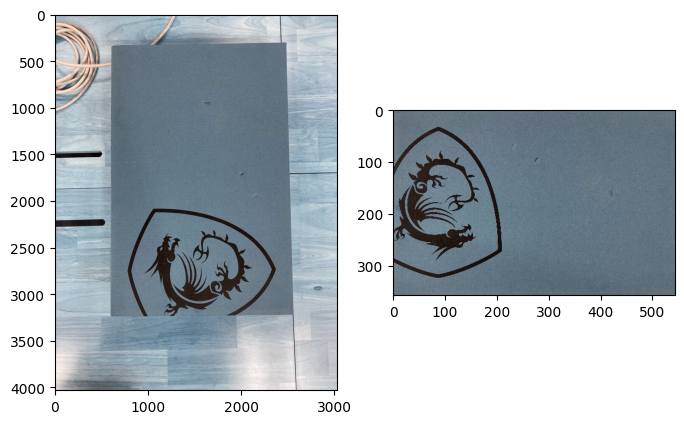

In [100]:

w2, h2 = pts2.max(axis=0).astype(int) 
img2 = cv2.warpPerspective(img.copy(), M, (w2,h2) )

# 結果表示 
fig = plt.figure(figsize=(8,8))
fig.add_subplot(1,2,1).imshow(img)
fig.add_subplot(1,2,2).imshow(img2)
plt.show()

In [34]:
# img_resize = cv2.resize(img, (1024, 1024))
# img_resize.shape

In [101]:
cv2.imwrite("./assets/mobile_aloha/assets/cardboard_homography.png", img2[::-1])

True

In [93]:
cv2.imwrite("./assets/mobile_aloha/assets/tabletop_homography.png", img2)

True